# Comp 6934 Winter 2025 Note 5

These notes are modified from notes by Dr. Terrance Tricco.

by E Brown.

In this notebook, we will do more on the pandas data library and focus on the following concepts:

- Date and Time functionality
- Combining DataFrames

Data taken from:
* https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset



## Import libraries

In [148]:
import pandas as pd


## Load data

We use the ``parse_dates=`` argument to convert data in these columns to Timestamp objects.

In [153]:
df = pd.read_csv('datasets/CA_videos.csv')

## Review of last lecture

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72384 entries, 0 to 72383
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           72384 non-null  object
 1   publish_time       72384 non-null  object
 2   trending_date      72384 non-null  object
 3   title              72384 non-null  object
 4   channel_title      72384 non-null  object
 5   channel_id         72384 non-null  object
 6   category_id        72384 non-null  int64 
 7   tags               72384 non-null  object
 8   views              72384 non-null  int64 
 9   likes              72384 non-null  int64 
 10  dislikes           72384 non-null  int64 
 11  comment_count      72384 non-null  int64 
 12  thumbnail_link     72384 non-null  object
 13  comments_disabled  72384 non-null  bool  
 14  ratings_disabled   72384 non-null  bool  
 15  description        72031 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

Calculate extra quantities, such as the ratio between likes and views.

In [155]:
df['like_ratio'] = df['likes'] / df['views']

Some videos have NaN or Infinity for the like_ratio. This occurs when they had 0 dislikes (divide by zero). 

One option is to filter these videos out of the data set.

In [156]:
df = df[df['views'] > 0]

We can use `drop_duplicates()` to remove multiple representations of the same video.

In [157]:
df = df.drop_duplicates('video_id', keep='first')

We can use `groupby()` to apply operations on segments of our data set. For example, to calculate the average number of views per channel.

In [158]:
df[['channel_title', 'views']].groupby('channel_title').mean().reset_index()

,channel_title,views
0,3 Southern Cats and Momma™,226011.0
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),5757954.0
2,*NSYNC,498360.0
3,10 News First,635317.0
4,11Alive,174821.0
...,...,...
3772,일일칠 - 117,2416077.0
3773,채널 십오야,1133018.0
3774,콜드 Colde,1024357.0
3775,쿠팡플레이 스포츠,1003171.0


Or to calculate statistics based on category and whether ratings were disabled.

In [159]:
df[['ratings_disabled', 'category_id', 'views', 'likes', 'comment_count']].groupby(['ratings_disabled', 'category_id']).mean().sort_values(by='category_id').reset_index()

,ratings_disabled,category_id,views,likes,comment_count
0,False,1,2.369523e+06,80018.064516,6041.333333
1,True,1,2.952986e+06,0.000000,1184.375000
2,False,2,6.162509e+05,34968.940000,2496.302857
3,False,10,2.535983e+06,172163.211025,14222.901600
4,True,10,6.428250e+06,0.000000,24328.071429
5,False,15,7.907968e+05,26870.545455,1786.709091
6,True,17,2.782448e+06,0.000000,3243.250000
7,False,17,1.067888e+06,21291.380076,1876.447592
8,False,19,4.457506e+05,21478.395161,1457.040323
9,True,20,5.938814e+05,0.000000,584.714286


## Time and date

pandas includes robust time and date functionality. It can parse strings into dates, and add and subtract two dates together to get the time difference. Components of a time or date (year, month, hour, minute, etc) can be extracted easily.

Our data set contains the publish time and trending date for each video. Both are stored just as strings.

In [160]:
df.info()  # publish_time and trending_date have object dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 13190 entries, 0 to 72201
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           13190 non-null  object 
 1   publish_time       13190 non-null  object 
 2   trending_date      13190 non-null  object 
 3   title              13190 non-null  object 
 4   channel_title      13190 non-null  object 
 5   channel_id         13190 non-null  object 
 6   category_id        13190 non-null  int64  
 7   tags               13190 non-null  object 
 8   views              13190 non-null  int64  
 9   likes              13190 non-null  int64  
 10  dislikes           13190 non-null  int64  
 11  comment_count      13190 non-null  int64  
 12  thumbnail_link     13190 non-null  object 
 13  comments_disabled  13190 non-null  bool   
 14  ratings_disabled   13190 non-null  bool   
 15  description        13120 non-null  object 
 16  like_ratio         13190 no

But we can convert these into a pandas ``Timestamp`` object. Then we can do useful things with them. 

The `publish_time` and `trending_date` are strings. Note the quotation marks around it (''), and we can also confirm this by checking its type.

In [161]:
df['publish_time'][0]

'2022-12-31T11:00:28Z'

In [162]:
type(df['publish_time'][0])

str

In [163]:
type(df['trending_date'][0])

str

We can use ``pd.to_datetime()`` to convert the string to a pandas ``Timestamp`` object.

In [164]:
pd.to_datetime(df['publish_time'][0])

Timestamp('2022-12-31 11:00:28+0000', tz='UTC')

In [165]:
type(pd.to_datetime(df['publish_time'][0]))

pandas._libs.tslibs.timestamps.Timestamp

We can also apply this to the whole column. Let's do that for both the publish time and trending date, then overwrite them back into their column. You will see that the type stored in those columns is now Timestamp objects, instead of strs.

In [166]:
df['publish_time']

0        2022-12-31T11:00:28Z
1        2022-12-31T04:22:33Z
2        2022-12-31T00:00:10Z
3        2022-12-30T18:29:36Z
4        2022-12-30T16:00:11Z
                 ...         
72190    2023-12-29T16:49:49Z
72191    2023-12-29T16:45:00Z
72192    2023-12-29T15:37:49Z
72199    2023-12-29T13:33:56Z
72201    2023-12-29T23:30:48Z
Name: publish_time, Length: 13190, dtype: object

In [169]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [170]:
df['publish_time']

0       2022-12-31 11:00:28+00:00
1       2022-12-31 04:22:33+00:00
2       2022-12-31 00:00:10+00:00
3       2022-12-30 18:29:36+00:00
4       2022-12-30 16:00:11+00:00
                   ...           
72190   2023-12-29 16:49:49+00:00
72191   2023-12-29 16:45:00+00:00
72192   2023-12-29 15:37:49+00:00
72199   2023-12-29 13:33:56+00:00
72201   2023-12-29 23:30:48+00:00
Name: publish_time, Length: 13190, dtype: datetime64[ns, UTC]

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13190 entries, 0 to 72201
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           13190 non-null  object             
 1   publish_time       13190 non-null  datetime64[ns, UTC]
 2   trending_date      13190 non-null  datetime64[ns, UTC]
 3   title              13190 non-null  object             
 4   channel_title      13190 non-null  object             
 5   channel_id         13190 non-null  object             
 6   category_id        13190 non-null  int64              
 7   tags               13190 non-null  object             
 8   views              13190 non-null  int64              
 9   likes              13190 non-null  int64              
 10  dislikes           13190 non-null  int64              
 11  comment_count      13190 non-null  int64              
 12  thumbnail_link     13190 non-null  object          

pandas is smart enough to do date comparisons. (Try doing this when they are a string. It may not work like you expect.)

In [174]:
type(df['publish_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [176]:
df[df['trending_date'] < '02-02-2023']

,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,like_ratio
0,xGd_HhPYX4A,2022-12-31 11:00:28+00:00,2023-01-01 00:00:00+00:00,The Brawlies 2022 - Brawl Stars Community Awar...,Brawl Stars,UCooVYzDxdwTtGYAkcPmOgOw,20,brawl stars|mobile game|mobile strategy game|m...,5212906,222661,0,12098,https://i.ytimg.com/vi/xGd_HhPYX4A/default.jpg,False,False,Download NOW!! ►► https://supr.cl/2K62CZGBe a ...,0.042713
1,3tApQl8ZTYU,2022-12-31 04:22:33+00:00,2023-01-01 00:00:00+00:00,John Cena & Kevin Owens vs. Roman Reigns & Sam...,WWE,UCJ5v_MCY6GNUBTO8-D3XoAg,17,Jey Uso|Jimmy Uso|John Cena|Kevin Owens|Paul H...,2706246,69898,0,4231,https://i.ytimg.com/vi/3tApQl8ZTYU/default.jpg,False,False,The Cenation Leader returns to SmackDown to jo...,0.025828
2,WA5XkP9qr2c,2022-12-31 00:00:10+00:00,2023-01-01 00:00:00+00:00,HIGHLIGHTS: Liverpool 2-1 Leicester City | TWO...,Liverpool FC,UC9LQwHZoucFT94I2h6JOcjw,17,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,3259684,50985,0,3892,https://i.ytimg.com/vi/WA5XkP9qr2c/default.jpg,False,False,"Watch the key action from Anfield, as two own ...",0.015641
3,gKgSvAyPFlU,2022-12-30 18:29:36+00:00,2023-01-01 00:00:00+00:00,YouTube's Terrible Christmas Movies,Drew Gooden,UCTSRIY3GLFYIpkR2QwyeklA,23,drew gooden|comedy|commentary|reaction|vine|dr...,1086824,89081,0,4482,https://i.ytimg.com/vi/gKgSvAyPFlU/default.jpg,False,False,Thanks to HelloFresh for sponsoring today's vi...,0.081965
4,OHL9uYzLEJ0,2022-12-30 16:00:11+00:00,2023-01-01 00:00:00+00:00,I Made a Theme Park Where Every Ride Is Life R...,Let's Game It Out,UCto7D1L-MiRoOziCXK9uT5Q,20,let's game it out|lets game it out|let game it...,1732368,95042,0,4250,https://i.ytimg.com/vi/OHL9uYzLEJ0/default.jpg,False,False,Download and play AFK Arena for free ► https:/...,0.054862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6248,IwJ_sTWtRZM,2023-01-30 19:00:08+00:00,2023-02-01 00:00:00+00:00,20 Things you SHOULD Be Buying at Dollar Tree ...,Liz Fenwick DIY,UCntvPlLI7oY_xap7_piH5UA,26,Liz Fenwick|Liz Fenwick DIY|Liz Fenwick Dollar...,145040,5156,0,966,https://i.ytimg.com/vi/IwJ_sTWtRZM/default.jpg,False,False,Shop with me for the best deals at Dollar Tree...,0.035549
6249,Bt_Z7pqSdHM,2023-01-30 21:00:04+00:00,2023-02-01 00:00:00+00:00,People Are Calling The NFL Rigged More Than Ev...,The Pat McAfee Show,UCxcTeAKWJca6XyJ37_ZoKIQ,17,pat mcafee|podcast|sports|nfl|ncaa|football|fo...,736086,12535,0,8795,https://i.ytimg.com/vi/Bt_Z7pqSdHM/default.jpg,False,False,This is a conversation from The Pat McAfee Sho...,0.017029
6250,bptJ_JTlRpo,2023-01-30 18:47:00+00:00,2023-02-01 00:00:00+00:00,I WAS ON THE DREW BARRYMORE SHOW!! *dream come...,RemLife,UCXLnGIevWGWK2dPDcvM5-CA,22,missremiashten|remlife|remi|cruz|vlog|vlogger|...,141162,8181,0,626,https://i.ytimg.com/vi/bptJ_JTlRpo/default.jpg,False,False,AHHH!!! be sure to check out my episode TODAY ...,0.057955
6251,2VMPookKOIw,2023-01-30 18:54:57+00:00,2023-02-01 00:00:00+00:00,NYC Vlog: Remi and Alisha Take New York!!,AlishaMarieVlogs,UCF1Q_zp3Eh3nuEHvMbdKkqg,26,Alisha Marie|AlishaMarieVlogs|alisha marie vlo...,138979,7688,0,308,https://i.ytimg.com/vi/2VMPookKOIw/default.jpg,False,False,Welcome backkkk!!! Who's excited to start seei...,0.055318


It can also be useful to set the type when the data is first read. As part of the ``.read_csv()`` call, we can specify which columns contain dates and how to parse them.

In [178]:
pd.read_csv('datasets/CA_videos.csv', parse_dates=['publish_time', 'trending_date'])

,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,xGd_HhPYX4A,2022-12-31 11:00:28+00:00,2023-01-01 00:00:00+00:00,The Brawlies 2022 - Brawl Stars Community Awar...,Brawl Stars,UCooVYzDxdwTtGYAkcPmOgOw,20,brawl stars|mobile game|mobile strategy game|m...,5212906,222661,0,12098,https://i.ytimg.com/vi/xGd_HhPYX4A/default.jpg,False,False,Download NOW!! ►► https://supr.cl/2K62CZGBe a ...
1,3tApQl8ZTYU,2022-12-31 04:22:33+00:00,2023-01-01 00:00:00+00:00,John Cena & Kevin Owens vs. Roman Reigns & Sam...,WWE,UCJ5v_MCY6GNUBTO8-D3XoAg,17,Jey Uso|Jimmy Uso|John Cena|Kevin Owens|Paul H...,2706246,69898,0,4231,https://i.ytimg.com/vi/3tApQl8ZTYU/default.jpg,False,False,The Cenation Leader returns to SmackDown to jo...
2,WA5XkP9qr2c,2022-12-31 00:00:10+00:00,2023-01-01 00:00:00+00:00,HIGHLIGHTS: Liverpool 2-1 Leicester City | TWO...,Liverpool FC,UC9LQwHZoucFT94I2h6JOcjw,17,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,3259684,50985,0,3892,https://i.ytimg.com/vi/WA5XkP9qr2c/default.jpg,False,False,"Watch the key action from Anfield, as two own ..."
3,gKgSvAyPFlU,2022-12-30 18:29:36+00:00,2023-01-01 00:00:00+00:00,YouTube's Terrible Christmas Movies,Drew Gooden,UCTSRIY3GLFYIpkR2QwyeklA,23,drew gooden|comedy|commentary|reaction|vine|dr...,1086824,89081,0,4482,https://i.ytimg.com/vi/gKgSvAyPFlU/default.jpg,False,False,Thanks to HelloFresh for sponsoring today's vi...
4,OHL9uYzLEJ0,2022-12-30 16:00:11+00:00,2023-01-01 00:00:00+00:00,I Made a Theme Park Where Every Ride Is Life R...,Let's Game It Out,UCto7D1L-MiRoOziCXK9uT5Q,20,let's game it out|lets game it out|let game it...,1732368,95042,0,4250,https://i.ytimg.com/vi/OHL9uYzLEJ0/default.jpg,False,False,Download and play AFK Arena for free ► https:/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72379,-VSq4JcmCCI,2023-12-19 03:30:11+00:00,2023-12-31 00:00:00+00:00,Diljit Dosanjh: Whatcha Doin (Official Video) ...,Diljit Dosanjh,UCZRdNleCgW-BGUJf-bbjzQg,10,[None],1208524,46397,0,1044,https://i.ytimg.com/vi/-VSq4JcmCCI/default.jpg,False,False,Whatcha Doin performed by Diljit Dosanjh from ...
72380,pQCJmxEOzhs,2023-12-20 14:05:26+00:00,2023-12-31 00:00:00+00:00,Our New Global Economy,Johnny Harris,UCmGSJVG3mCRXVOP4yZrU1Dw,25,Johnny Harris|Johnny Harris Vox|Vox Borders|Jo...,1837047,58035,0,5290,https://i.ytimg.com/vi/pQCJmxEOzhs/default.jpg,False,False,The End of GlobalizationUse code JOHNNYHARRIS ...
72381,6Ehkb4vURpM,2023-12-20 14:44:46+00:00,2023-12-31 00:00:00+00:00,Revealing My Name...,Beluga,UCmSp4bDxS9R0jpeZEvkut2g,20,[None],1387809,87093,0,5205,https://i.ytimg.com/vi/6Ehkb4vURpM/default.jpg,False,False,Subscribe here:https://www.youtube.com/channel...
72382,mrinp7EfVs0,2023-12-20 18:00:32+00:00,2023-12-31 00:00:00+00:00,Somehow We Got WORSE (Don't Win Mario Party),Smosh Games,UCJ2ZDzMRgSrxmwphstrm8Ww,20,smosh|smosh games|gaming|comedy|funny,654757,35294,0,1411,https://i.ytimg.com/vi/mrinp7EfVs0/default.jpg,False,False,We have to keep this cone in use at all costs....


### Time deltas

Let's calculate the time it took for each video to trend. That is just the trending date minus the publishing date.

In [179]:
df['time_to_trend'] = df['trending_date'] - df['publish_time']

In [180]:
df.head()

,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,like_ratio,time_to_trend
0,xGd_HhPYX4A,2022-12-31 11:00:28+00:00,2023-01-01 00:00:00+00:00,The Brawlies 2022 - Brawl Stars Community Awar...,Brawl Stars,UCooVYzDxdwTtGYAkcPmOgOw,20,brawl stars|mobile game|mobile strategy game|m...,5212906,222661,0,12098,https://i.ytimg.com/vi/xGd_HhPYX4A/default.jpg,False,False,Download NOW!! ►► https://supr.cl/2K62CZGBe a ...,0.042713,0 days 12:59:32
1,3tApQl8ZTYU,2022-12-31 04:22:33+00:00,2023-01-01 00:00:00+00:00,John Cena & Kevin Owens vs. Roman Reigns & Sam...,WWE,UCJ5v_MCY6GNUBTO8-D3XoAg,17,Jey Uso|Jimmy Uso|John Cena|Kevin Owens|Paul H...,2706246,69898,0,4231,https://i.ytimg.com/vi/3tApQl8ZTYU/default.jpg,False,False,The Cenation Leader returns to SmackDown to jo...,0.025828,0 days 19:37:27
2,WA5XkP9qr2c,2022-12-31 00:00:10+00:00,2023-01-01 00:00:00+00:00,HIGHLIGHTS: Liverpool 2-1 Leicester City | TWO...,Liverpool FC,UC9LQwHZoucFT94I2h6JOcjw,17,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,3259684,50985,0,3892,https://i.ytimg.com/vi/WA5XkP9qr2c/default.jpg,False,False,"Watch the key action from Anfield, as two own ...",0.015641,0 days 23:59:50
3,gKgSvAyPFlU,2022-12-30 18:29:36+00:00,2023-01-01 00:00:00+00:00,YouTube's Terrible Christmas Movies,Drew Gooden,UCTSRIY3GLFYIpkR2QwyeklA,23,drew gooden|comedy|commentary|reaction|vine|dr...,1086824,89081,0,4482,https://i.ytimg.com/vi/gKgSvAyPFlU/default.jpg,False,False,Thanks to HelloFresh for sponsoring today's vi...,0.081965,1 days 05:30:24
4,OHL9uYzLEJ0,2022-12-30 16:00:11+00:00,2023-01-01 00:00:00+00:00,I Made a Theme Park Where Every Ride Is Life R...,Let's Game It Out,UCto7D1L-MiRoOziCXK9uT5Q,20,let's game it out|lets game it out|let game it...,1732368,95042,0,4250,https://i.ytimg.com/vi/OHL9uYzLEJ0/default.jpg,False,False,Download and play AFK Arena for free ► https:/...,0.054862,1 days 07:59:49


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13190 entries, 0 to 72201
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           13190 non-null  object             
 1   publish_time       13190 non-null  datetime64[ns, UTC]
 2   trending_date      13190 non-null  datetime64[ns, UTC]
 3   title              13190 non-null  object             
 4   channel_title      13190 non-null  object             
 5   channel_id         13190 non-null  object             
 6   category_id        13190 non-null  int64              
 7   tags               13190 non-null  object             
 8   views              13190 non-null  int64              
 9   likes              13190 non-null  int64              
 10  dislikes           13190 non-null  int64              
 11  comment_count      13190 non-null  int64              
 12  thumbnail_link     13190 non-null  object          

In [182]:
df.time_to_trend.max()

Timedelta('27 days 02:51:02')

In [183]:
df[df.time_to_trend == df.time_to_trend.max()]

,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,like_ratio,time_to_trend
20654,phtcAd8j6Ro,2023-03-17 21:08:58+00:00,2023-04-14 00:00:00+00:00,Doechii - What It Is (Block Boy) feat. Kodak B...,IamdoechiiVEVO,UC9bzTEvPeXjS6uyirHHRIvw,10,Doechii|What|(Block|Boy)|Top|Dawg|Entertainmen...,2773736,85004,0,3126,https://i.ytimg.com/vi/phtcAd8j6Ro/default.jpg,False,False,Stream//Download What It Is (Versions) here: h...,0.030646,27 days 02:51:02


We can also notice some potential data issues. (How could a video go trending before it was published?)

In [184]:
df[df.time_to_trend < pd.Timedelta(0)]

,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,like_ratio,time_to_trend
2400,G7KNmW9a75Y,2023-01-13 00:00:09+00:00,2023-01-13 00:00:00+00:00,Miley Cyrus - Flowers (Official Video),MileyCyrusVEVO,UCdI8evszfZvyAl2UVCypkTA,10,Miley|Cyrus|MCEO|Miley New Song|Miley New Albu...,4259808,358431,0,21084,https://i.ytimg.com/vi/G7KNmW9a75Y/default.jpg,False,False,Official Video for “Flowers” by Miley CyrusLis...,0.084143,-1 days +23:59:51
8004,7NK_JOkuSVY,2023-02-10 05:00:08+00:00,2023-02-10 00:00:00+00:00,Lost [Official Music Video] - Linkin Park,Linkin Park,UCZU9T1ceaOgwfLRq7OKFU4Q,10,Linkin Park|Chester Bennington|Mike Shinoda|Br...,690248,185609,0,15190,https://i.ytimg.com/vi/7NK_JOkuSVY/default.jpg,False,False,Download/Stream Lost : http://lprk.co/lostVide...,0.268902,-1 days +18:59:52
8601,HjBo--1n8lI,2023-02-13 03:58:18+00:00,2023-02-13 00:00:00+00:00,Rihanna’s FULL Apple Music Super Bowl LVII Hal...,NFL,UCDVYQ4Zhbm3S2dlz7P1GBDg,17,NFL|Football|American Football|sport|sports,6700452,528314,0,32982,https://i.ytimg.com/vi/HjBo--1n8lI/default.jpg,False,False,Listen to Rihanna’s iconic hits in Spatial Aud...,0.078848,-1 days +20:01:42
8607,BWkt79xkd00,2023-02-13 03:47:00+00:00,2023-02-13 00:00:00+00:00,Kansas City Chiefs vs. Philadelphia Eagles | 2...,NFL,UCDVYQ4Zhbm3S2dlz7P1GBDg,17,[None],1921683,44027,0,10685,https://i.ytimg.com/vi/BWkt79xkd00/default.jpg,False,False,Check out our other channels:NFL Mundo https:/...,0.022911,-1 days +20:13:00
10795,jZGpkLElSu8,2023-02-24 05:00:09+00:00,2023-02-24 00:00:00+00:00,"KAROL G, Shakira - TQG (Official Video)",KarolGVEVO,UCz9yS18zJGQObwUL_K-ICnw,10,karol|MSB|TQG|TQG karol|TQG shakira|karol shak...,4945251,1009614,0,54505,https://i.ytimg.com/vi/jZGpkLElSu8/default.jpg,False,False,Escucha / Stream “MSB” on your favorite platfo...,0.204158,-1 days +18:59:51
13598,v_4fljfr2r4,2023-03-10 05:00:09+00:00,2023-03-10 00:00:00+00:00,Miley Cyrus - River (Official Video),MileyCyrusVEVO,UCdI8evszfZvyAl2UVCypkTA,10,Columbia|Miley Cyrus|Pop|River,815367,110228,0,6582,https://i.ytimg.com/vi/v_4fljfr2r4/default.jpg,False,False,Official Video for “River” by Miley Cyrus List...,0.135188,-1 days +18:59:51
13675,9MiaHlOUExM,2023-03-10 05:11:09+00:00,2023-03-10 00:00:00+00:00,Miley Cyrus - Jaded (Audio),Miley Cyrus,UCn7dB9UMTBDjKtEKBy_XISw,24,Miley|Cyrus|MiFans|MileyWorld,92556,14082,0,660,https://i.ytimg.com/vi/9MiaHlOUExM/default.jpg,False,False,Official Audio for Jaded” by Miley Cyrus Liste...,0.152146,-1 days +18:48:51
17655,iEtPFB41lB0,2023-03-30 04:00:09+00:00,2023-03-30 00:00:00+00:00,G-Eazy - Tulips & Roses (Official Video),GEazyMusicVEVO,UCjjC1Jk_1o1VWpLalgo21XQ,10,Rap|Tulips Roses|geazy|easy|g-easy|eazy youtub...,43849,7937,0,625,https://i.ytimg.com/vi/iEtPFB41lB0/default.jpg,False,False,Stream Tulips & Roses Now: https://geazy.lnk.t...,0.181008,-1 days +19:59:51
20622,_hbTRYrshQQ,2023-04-14 04:00:10+00:00,2023-04-14 00:00:00+00:00,Dominic Fike - Dancing in the Courthouse (Offi...,Dominic Fike,UCcwcJT8pVnq5MIDuNfca38Q,10,Dominic Fike|What Could Possibly Go Wrong|Danc...,39792,7569,0,648,https://i.ytimg.com/vi/_hbTRYrshQQ/default.jpg,False,False,Official video for Dominic Fike Dancing in the...,0.190214,-1 days +19:59:50
20629,5UBvlt25MwY,2023-04-14 04:00:01+00:00,2023-04-14 00:00:00+00:00,NLE Choppa - Talk Different (Official Video),NLE CHOPPA,UCWICXNlSLc7eeNazpzUZcLg,10,nle choppa videos|nle choppa music|nle choppa ...,59516,9756,0,1047,https://i.ytimg.com/vi/5UBvlt25MwY/default.jpg,False,False,NLE Choppa- Talk Different (Official Video)Str...,0.163922,-1 days +19:59:59


With the ``Timestamp`` object, you can also then access the specific components of the date. For example, using ``.dt.day`` or ``.dt.month`` will return the day or the month component. There are many more options listed in the API: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

In [187]:
df['publish_time'].dt.month

0        12
1        12
2        12
3        12
4        12
         ..
72190    12
72191    12
72192    12
72199    12
72201    12
Name: publish_time, Length: 13190, dtype: int32

In [ ]:
df.describe()

## String Functions

Just like `.dt` provides access to a range of date and time functionality, `.str` provides access to a range of string functionality.

We can already do string comparisons when filtering without using `.str`.

In [ ]:
df[df.channel_title == 'Marvel Entertainment']

What about if we wanted all videos that contain the word "Trailer" in it?

In [ ]:
df[df.title.str.contains('Trailer')]

There is a lot of other functinality that you should be familiar with from Python, such as `split()`, `strip()`, `lower()`, etc.

For example, there are no videos that contrain the string "mario". However, there are plenty of Mario videos that go trending. The capitalization of our string comparison matters. We can convert everything to lowercase to catch all videos regardless of their capitalization.

In [ ]:
df[df.title.str.contains('mario')]

In [ ]:
df[df.title.str.lower().str.contains('mario')]

## Combining DataFrames

One simple way to combine DataFrames is to use ``pd.concat()``. This will merge one DataFrame to the bottom of another DataFrame.

``pd.concat()`` is a global function. It accepts a list of DataFrames to concatenate. (It also accepts Series.)

In [188]:
pd.concat([df, df])

,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,like_ratio,time_to_trend
0,xGd_HhPYX4A,2022-12-31 11:00:28+00:00,2023-01-01 00:00:00+00:00,The Brawlies 2022 - Brawl Stars Community Awar...,Brawl Stars,UCooVYzDxdwTtGYAkcPmOgOw,20,brawl stars|mobile game|mobile strategy game|m...,5212906,222661,0,12098,https://i.ytimg.com/vi/xGd_HhPYX4A/default.jpg,False,False,Download NOW!! ►► https://supr.cl/2K62CZGBe a ...,0.042713,0 days 12:59:32
1,3tApQl8ZTYU,2022-12-31 04:22:33+00:00,2023-01-01 00:00:00+00:00,John Cena & Kevin Owens vs. Roman Reigns & Sam...,WWE,UCJ5v_MCY6GNUBTO8-D3XoAg,17,Jey Uso|Jimmy Uso|John Cena|Kevin Owens|Paul H...,2706246,69898,0,4231,https://i.ytimg.com/vi/3tApQl8ZTYU/default.jpg,False,False,The Cenation Leader returns to SmackDown to jo...,0.025828,0 days 19:37:27
2,WA5XkP9qr2c,2022-12-31 00:00:10+00:00,2023-01-01 00:00:00+00:00,HIGHLIGHTS: Liverpool 2-1 Leicester City | TWO...,Liverpool FC,UC9LQwHZoucFT94I2h6JOcjw,17,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,3259684,50985,0,3892,https://i.ytimg.com/vi/WA5XkP9qr2c/default.jpg,False,False,"Watch the key action from Anfield, as two own ...",0.015641,0 days 23:59:50
3,gKgSvAyPFlU,2022-12-30 18:29:36+00:00,2023-01-01 00:00:00+00:00,YouTube's Terrible Christmas Movies,Drew Gooden,UCTSRIY3GLFYIpkR2QwyeklA,23,drew gooden|comedy|commentary|reaction|vine|dr...,1086824,89081,0,4482,https://i.ytimg.com/vi/gKgSvAyPFlU/default.jpg,False,False,Thanks to HelloFresh for sponsoring today's vi...,0.081965,1 days 05:30:24
4,OHL9uYzLEJ0,2022-12-30 16:00:11+00:00,2023-01-01 00:00:00+00:00,I Made a Theme Park Where Every Ride Is Life R...,Let's Game It Out,UCto7D1L-MiRoOziCXK9uT5Q,20,let's game it out|lets game it out|let game it...,1732368,95042,0,4250,https://i.ytimg.com/vi/OHL9uYzLEJ0/default.jpg,False,False,Download and play AFK Arena for free ► https:/...,0.054862,1 days 07:59:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72190,6ZwBHQH61QU,2023-12-29 16:49:49+00:00,2023-12-31 00:00:00+00:00,I Built a 7-11 in my Room and Hid it from my Mom!,The Royalty Family,UCja7QUMRG9AD8X2F_vXFb9A,22,The Royalty Family|Royalty Family|Andrea Espad...,3178494,68329,0,5331,https://i.ytimg.com/vi/6ZwBHQH61QU/default.jpg,False,False,I Built a 7-11 in my Room and Hid it from my M...,0.021497,1 days 07:10:11
72191,B-HF-wBwQsc,2023-12-29 16:45:00+00:00,2023-12-31 00:00:00+00:00,True Facts: Crows That Hunt With Sticks,Ze Frank,UCVpankR4HtoAVtYnFDUieYA,15,[None],677736,59870,0,2567,https://i.ytimg.com/vi/B-HF-wBwQsc/default.jpg,False,False,Go to https://brilliant.org/zefrank to get a 3...,0.088338,1 days 07:15:00
72192,FyJUNqBHxd8,2023-12-29 15:37:49+00:00,2023-12-31 00:00:00+00:00,Santa bought me a car,madelineargy,UCw24-aQvuVMP3C8gAduidPg,22,[None],250169,15428,0,367,https://i.ytimg.com/vi/FyJUNqBHxd8/default.jpg,False,False,I enjoyed filming this very much,0.061670,1 days 08:22:11
72199,P_x5JmRcV8k,2023-12-29 13:33:56+00:00,2023-12-31 00:00:00+00:00,"“떨어지는 비에도 꽃은 피어나니까” 화사, 잔잔하지만 가슴을 울리는 축하무대 ＜LM...",SBS Drama,UC6erIDuvbOaAO-OT5rB2Xew,24,sbs|20231229|화사|축하무대|연기대상|2023연기대상|SBS연기대상|202...,705298,18997,0,1076,https://i.ytimg.com/vi/P_x5JmRcV8k/default.jpg,False,False,2023 SBS 연기대상‘2023 SBS 연기대상’☞ 12월 29일 오후 8시 40...,0.026935,1 days 10:26:04


Here we have just appended the same DataFrame to the bottom of itself.

You can see that each row is duplicated - including the index label. (Remember that while index labels are often just the row number, they can take on any value.) Of course, we could just `.reset_index()`.

In [189]:
pd.concat([df, df]).reset_index()

,index,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,like_ratio,time_to_trend
0,0,xGd_HhPYX4A,2022-12-31 11:00:28+00:00,2023-01-01 00:00:00+00:00,The Brawlies 2022 - Brawl Stars Community Awar...,Brawl Stars,UCooVYzDxdwTtGYAkcPmOgOw,20,brawl stars|mobile game|mobile strategy game|m...,5212906,222661,0,12098,https://i.ytimg.com/vi/xGd_HhPYX4A/default.jpg,False,False,Download NOW!! ►► https://supr.cl/2K62CZGBe a ...,0.042713,0 days 12:59:32
1,1,3tApQl8ZTYU,2022-12-31 04:22:33+00:00,2023-01-01 00:00:00+00:00,John Cena & Kevin Owens vs. Roman Reigns & Sam...,WWE,UCJ5v_MCY6GNUBTO8-D3XoAg,17,Jey Uso|Jimmy Uso|John Cena|Kevin Owens|Paul H...,2706246,69898,0,4231,https://i.ytimg.com/vi/3tApQl8ZTYU/default.jpg,False,False,The Cenation Leader returns to SmackDown to jo...,0.025828,0 days 19:37:27
2,2,WA5XkP9qr2c,2022-12-31 00:00:10+00:00,2023-01-01 00:00:00+00:00,HIGHLIGHTS: Liverpool 2-1 Leicester City | TWO...,Liverpool FC,UC9LQwHZoucFT94I2h6JOcjw,17,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,3259684,50985,0,3892,https://i.ytimg.com/vi/WA5XkP9qr2c/default.jpg,False,False,"Watch the key action from Anfield, as two own ...",0.015641,0 days 23:59:50
3,3,gKgSvAyPFlU,2022-12-30 18:29:36+00:00,2023-01-01 00:00:00+00:00,YouTube's Terrible Christmas Movies,Drew Gooden,UCTSRIY3GLFYIpkR2QwyeklA,23,drew gooden|comedy|commentary|reaction|vine|dr...,1086824,89081,0,4482,https://i.ytimg.com/vi/gKgSvAyPFlU/default.jpg,False,False,Thanks to HelloFresh for sponsoring today's vi...,0.081965,1 days 05:30:24
4,4,OHL9uYzLEJ0,2022-12-30 16:00:11+00:00,2023-01-01 00:00:00+00:00,I Made a Theme Park Where Every Ride Is Life R...,Let's Game It Out,UCto7D1L-MiRoOziCXK9uT5Q,20,let's game it out|lets game it out|let game it...,1732368,95042,0,4250,https://i.ytimg.com/vi/OHL9uYzLEJ0/default.jpg,False,False,Download and play AFK Arena for free ► https:/...,0.054862,1 days 07:59:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26375,72190,6ZwBHQH61QU,2023-12-29 16:49:49+00:00,2023-12-31 00:00:00+00:00,I Built a 7-11 in my Room and Hid it from my Mom!,The Royalty Family,UCja7QUMRG9AD8X2F_vXFb9A,22,The Royalty Family|Royalty Family|Andrea Espad...,3178494,68329,0,5331,https://i.ytimg.com/vi/6ZwBHQH61QU/default.jpg,False,False,I Built a 7-11 in my Room and Hid it from my M...,0.021497,1 days 07:10:11
26376,72191,B-HF-wBwQsc,2023-12-29 16:45:00+00:00,2023-12-31 00:00:00+00:00,True Facts: Crows That Hunt With Sticks,Ze Frank,UCVpankR4HtoAVtYnFDUieYA,15,[None],677736,59870,0,2567,https://i.ytimg.com/vi/B-HF-wBwQsc/default.jpg,False,False,Go to https://brilliant.org/zefrank to get a 3...,0.088338,1 days 07:15:00
26377,72192,FyJUNqBHxd8,2023-12-29 15:37:49+00:00,2023-12-31 00:00:00+00:00,Santa bought me a car,madelineargy,UCw24-aQvuVMP3C8gAduidPg,22,[None],250169,15428,0,367,https://i.ytimg.com/vi/FyJUNqBHxd8/default.jpg,False,False,I enjoyed filming this very much,0.061670,1 days 08:22:11
26378,72199,P_x5JmRcV8k,2023-12-29 13:33:56+00:00,2023-12-31 00:00:00+00:00,"“떨어지는 비에도 꽃은 피어나니까” 화사, 잔잔하지만 가슴을 울리는 축하무대 ＜LM...",SBS Drama,UC6erIDuvbOaAO-OT5rB2Xew,24,sbs|20231229|화사|축하무대|연기대상|2023연기대상|SBS연기대상|202...,705298,18997,0,1076,https://i.ytimg.com/vi/P_x5JmRcV8k/default.jpg,False,False,2023 SBS 연기대상‘2023 SBS 연기대상’☞ 12월 29일 오후 8시 40...,0.026935,1 days 10:26:04


Let's make two DataFrames based on ``groupby()``. One DataFrame will contain the total number of views per channel and the other the total number of likes.

In [190]:
df_views = df[['channel_title', 'views']].groupby('channel_title').mean().reset_index()

In [191]:
df_views.rename(columns={'views':'total_views'}, inplace=True)

In [192]:
df_likes = df[['likes', 'channel_title']].groupby('channel_title').sum().reset_index().rename(columns={'likes': 'total_likes'})

In [193]:
df_views

,channel_title,total_views
0,3 Southern Cats and Momma™,226011.0
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),5757954.0
2,*NSYNC,498360.0
3,10 News First,635317.0
4,11Alive,174821.0
...,...,...
3772,일일칠 - 117,2416077.0
3773,채널 십오야,1133018.0
3774,콜드 Colde,1024357.0
3775,쿠팡플레이 스포츠,1003171.0


In [194]:
df_likes

,channel_title,total_likes
0,3 Southern Cats and Momma™,20720
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),1489909
2,*NSYNC,31604
3,10 News First,6126
4,11Alive,494
...,...,...
3772,일일칠 - 117,93768
3773,채널 십오야,20245
3774,콜드 Colde,259539
3775,쿠팡플레이 스포츠,9888


It would not be sensible to just concatenate the two DataFrames. 

The second DataFrame would be appended to the first. Each channel title appears twice -- onw row with total likes plus NaN for total views, and a second row for total views plus NaN for total likes.

It would be more sensible to have a single entry for channel title that contains the total likes and total views.

In [196]:
pd.concat([df_likes, df_views])

,channel_title,total_likes,total_views
0,3 Southern Cats and Momma™,20720.0,NaN
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),1489909.0,NaN
2,*NSYNC,31604.0,NaN
3,10 News First,6126.0,NaN
4,11Alive,494.0,NaN
...,...,...,...
3772,일일칠 - 117,NaN,2416077.0
3773,채널 십오야,NaN,1133018.0
3774,콜드 Colde,NaN,1024357.0
3775,쿠팡플레이 스포츠,NaN,1003171.0


How we can combine the columns of these DataFrames in a reasonable way?

``merge()`` joins two DataFrames together, often on a shared column. This is a database style join, almost identical to what you would do in SQL.

Let's look at a simple example.

In [197]:
df_likes.merge(df_views)

,channel_title,total_likes,total_views
0,3 Southern Cats and Momma™,20720,226011.0
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),1489909,5757954.0
2,*NSYNC,31604,498360.0
3,10 News First,6126,635317.0
4,11Alive,494,174821.0
...,...,...,...
3772,일일칠 - 117,93768,2416077.0
3773,채널 십오야,20245,1133018.0
3774,콜드 Colde,259539,1024357.0
3775,쿠팡플레이 스포츠,9888,1003171.0


Now it has merged our two DataFrames together in a sensible way.

We can also be explicit about which columns to join on, in case of ambiguity, by using the ``on=`` parameter.

In [ ]:
df_likes.merge(df_views, on='channel_title')

All that said, you can use the regular column assignment functionality of pandas in many cases. If the index columns of your DataFrames match, then this may often be simpler and more straightforward to understand.

In [198]:
df_likes

,channel_title,total_likes
0,3 Southern Cats and Momma™,20720
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),1489909
2,*NSYNC,31604
3,10 News First,6126
4,11Alive,494
...,...,...
3772,일일칠 - 117,93768
3773,채널 십오야,20245
3774,콜드 Colde,259539
3775,쿠팡플레이 스포츠,9888


In [199]:
df_likes['total_views'] = df_views['total_views']

In [200]:
df_likes

,channel_title,total_likes,total_views
0,3 Southern Cats and Momma™,20720,226011.0
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),1489909,5757954.0
2,*NSYNC,31604,498360.0
3,10 News First,6126,635317.0
4,11Alive,494,174821.0
...,...,...,...
3772,일일칠 - 117,93768,2416077.0
3773,채널 십오야,20245,1133018.0
3774,콜드 Colde,259539,1024357.0
3775,쿠팡플레이 스포츠,9888,1003171.0


``merge()`` really shines when the index columns of two DataFrames don't line up, such as DataFrames of two different sizes. In this case, ``merge()`` supports many different kinds of joins, including:
- **Left**: use only keys from left frame, similar to a SQL left outer join; preserve key order.
- **Right**: use only keys from right frame, similar to a SQL right outer join; preserve key order.
- **Outer**: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
- **Inner**: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.
- **Cross**: creates the cartesian product from both frames, preserves the order of the left keys.



Let's make the list of channels in our DataFrames slightly different from each other so we can see the differences.

In [201]:
df_views = df[['views', 'channel_title']].groupby('channel_title').sum().reset_index().rename(columns={'views': 'total_views'})

In [202]:
df_likes = df[['likes', 'channel_title']].groupby('channel_title').sum().reset_index().rename(columns={'likes': 'total_likes'})

In [203]:
df_views

,channel_title,total_views
0,3 Southern Cats and Momma™,226011
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),28789770
2,*NSYNC,498360
3,10 News First,635317
4,11Alive,174821
...,...,...
3772,일일칠 - 117,2416077
3773,채널 십오야,1133018
3774,콜드 Colde,1024357
3775,쿠팡플레이 스포츠,1003171


In [204]:
df_likes

,channel_title,total_likes
0,3 Southern Cats and Momma™,20720
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),1489909
2,*NSYNC,31604
3,10 News First,6126
4,11Alive,494
...,...,...
3772,일일칠 - 117,93768
3773,채널 십오야,20245
3774,콜드 Colde,259539
3775,쿠팡플레이 스포츠,9888


In [205]:
df_views = df_views[df_views['channel_title'] < 'M']

In [206]:
df_likes = df_likes[df_likes['channel_title'] >= 'G']

In [207]:
df_likes

,channel_title,total_likes
1105,GAZO OFFICIEL,111171
1106,GCN Racing,18163
1107,GD Colon,39252
1108,GEVidsTV,31136
1109,GEazyMusicVEVO,7937
...,...,...
3772,일일칠 - 117,93768
3773,채널 십오야,20245
3774,콜드 Colde,259539
3775,쿠팡플레이 스포츠,9888


In [208]:
len(df_views)

1855

In [209]:
len(df_likes)

2672

Now our views DataFrame only contains videos starting with A to L, whereas our likes DataFrame contains videos starting from G to Z.

You can see that they have a different number of videos.

Let's try ``.merge(how = 'inner')``.

In [210]:
df_views.merge(df_likes, on='channel_title', how='inner')

,channel_title,total_views,total_likes
0,GAZO OFFICIEL,1029547,111171
1,GCN Racing,1224207,18163
2,GD Colon,568795,39252
3,GEVidsTV,1055355,31136
4,GEazyMusicVEVO,43849,7937
...,...,...,...
745,Luton Town Football Club,6629149,63974
746,LxckTV,297478,5966
747,Lyca Productions,4065338,266153
748,Lyrical Lemonade,11023037,1030031


In this case, we have taken the intersection of channel titles. Our resultant DataFrame has only 750 rows, that being all the videos starting with G, H, I, J, K or L. Only the channel titles in common between the two DataFrames are kept.

Now let's ty ``.merge(how = 'outer')``.

In [211]:
df_tmp = df_views.merge(df_likes, on='channel_title', how='outer')

In [212]:
df_tmp

,channel_title,total_views,total_likes
0,3 Southern Cats and Momma™,226011.0,NaN
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),28789770.0,NaN
2,*NSYNC,498360.0,NaN
3,10 News First,635317.0,NaN
4,11Alive,174821.0,NaN
...,...,...,...
3772,일일칠 - 117,NaN,93768.0
3773,채널 십오야,NaN,20245.0
3774,콜드 Colde,NaN,259539.0
3775,쿠팡플레이 스포츠,NaN,9888.0


In [213]:
df_tmp[df_tmp['channel_title'].str.startswith('G')].head()

,channel_title,total_views,total_likes
1105,GAZO OFFICIEL,1029547.0,111171.0
1106,GCN Racing,1224207.0,18163.0
1107,GD Colon,568795.0,39252.0
1108,GEVidsTV,1055355.0,31136.0
1109,GEazyMusicVEVO,43849.0,7937.0


In this case, it has taken the union of the channel titles. *All* channel titles contained in both DataFrames get represented. You can see that pandas has inserted NaN where there is no overlap. 

Channels that overlap between the two DataFrames do contain both sets of data (for example, channels starting with 'G').

``.merge(how = 'left')`` and ``.merge(how = 'right')`` specify whether to use the keys from the starting DataFrame (left) or the DataFrame that is to be merged in (right).

In [214]:
len(df_views)

1855

In [218]:
df_views.merge(df_likes, on='channel_title', how='left')

,channel_title,total_views,total_likes
0,3 Southern Cats and Momma™,226011,NaN
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),28789770,NaN
2,*NSYNC,498360,NaN
3,10 News First,635317,NaN
4,11Alive,174821,NaN
...,...,...,...
1850,Luton Town Football Club,6629149,63974.0
1851,LxckTV,297478,5966.0
1852,Lyca Productions,4065338,266153.0
1853,Lyrical Lemonade,11023037,1030031.0


In [219]:
df_views.merge(df_likes, on='channel_title', how='right')

,channel_title,total_views,total_likes
0,GAZO OFFICIEL,1029547.0,111171
1,GCN Racing,1224207.0,18163
2,GD Colon,568795.0,39252
3,GEVidsTV,1055355.0,31136
4,GEazyMusicVEVO,43849.0,7937
...,...,...,...
2667,일일칠 - 117,NaN,93768
2668,채널 십오야,NaN,20245
2669,콜드 Colde,NaN,259539
2670,쿠팡플레이 스포츠,NaN,9888


The ``left`` join has used the channel titles from df_views, that is, the base DataFrame that you are calling from. You can see that the number of rows on the ``left`` join is the same number as what df_views started with.

The ``right`` join has used the channel titles from df_likes. Number of rows equals the number of rows that df_likes started with.

This Venn diagram may help.

![](images/merge_venn.png)

### Matplotlib and datetime64

Time series data is frequently discussed in data analysis, and typically plots will run time left-to-right on the x axis so the user can see some quantity change over time.

Revent versions of Matplotlib are able to handle datetime64 types (the base type for panda's TimeStamp). So we can use pandas' preferred time representation in our plot data.

In [220]:
df_nl = pd.read_csv('datasets/jash312i/NL_weather.csv')

/tmp/ipykernel_181700/2064318145.py:1: DtypeWarning: Columns (3,20,22,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nl = pd.read_csv('datasets/jash312i/NL_weather.csv')


In [221]:
df_sja = df_nl[df_nl['Station Name'].str.contains("ST. JOHN'S INTL")].reset_index() # reset index will force a new df and not a slice.
df_sja['Date/Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2191 entries, 0 to 2190
Series name: Date/Time
Non-Null Count  Dtype 
--------------  ----- 
2191 non-null   object
dtypes: object(1)
memory usage: 17.2+ KB


In [222]:
df_sja['Date/Time'] = pd.to_datetime(df_sja['Date/Time'])

If the data did not have separate year, month and day columns, you can still use datetime methods to select records:

In [226]:
df_j2020 = df_sja[(df_sja['Date/Time'] >= '2020-1-1') & (df_sja['Date/Time'] <= '2020-1-31')]
df_j2020

,index,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
730,52936,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-01-01,2020,1,1,NaN,...,2.6,NaN,6.2,NaN,36.0,NaN,15.0,NaN,87.0,NaN
731,52937,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-01-02,2020,1,2,NaN,...,0.0,T,0.8,NaN,28.0,NaN,24.0,NaN,54.0,NaN
732,52938,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-01-03,2020,1,3,NaN,...,0.0,T,0.0,T,25.0,NaN,29.0,NaN,65.0,NaN
733,52939,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-01-04,2020,1,4,NaN,...,0.2,NaN,0.2,NaN,24.0,NaN,28.0,NaN,45.0,NaN
734,52940,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-01-05,2020,1,5,NaN,...,30.2,NaN,17.4,NaN,24.0,NaN,2.0,NaN,84.0,NaN
735,52941,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-01-06,2020,1,6,NaN,...,12.8,NaN,9.4,NaN,63.0,NaN,3.0,NaN,93.0,NaN
736,52942,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-01-07,2020,1,7,NaN,...,7.0,NaN,3.0,NaN,69.0,NaN,21.0,NaN,35.0,NaN
737,52943,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-01-08,2020,1,8,NaN,...,3.6,NaN,12.6,NaN,57.0,NaN,22.0,NaN,84.0,NaN
738,52944,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-01-09,2020,1,9,NaN,...,1.4,NaN,1.0,NaN,52.0,NaN,29.0,NaN,93.0,NaN
739,52945,-52.75,47.62,ST. JOHN'S INTL A,8403505,2020-01-10,2020,1,10,NaN,...,0.8,NaN,0.6,NaN,50.0,NaN,30.0,NaN,67.0,NaN


Let's use a bar chart for rainfall across the Jan 2020 month:

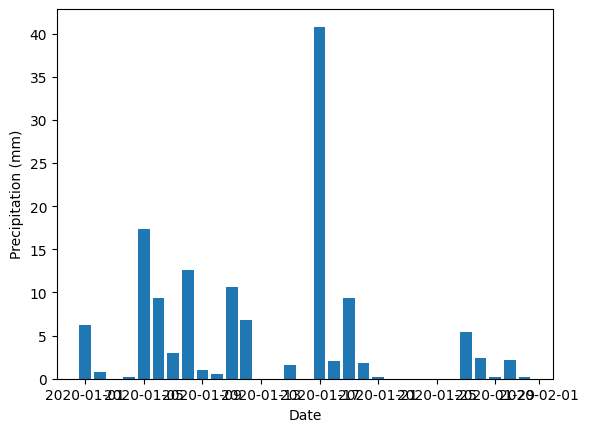

In [227]:
import matplotlib.pyplot as plt

plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')

plt.bar('Date/Time', 'Total Precip (mm)', data=df_j2020)
plt.show()

Let's turn the xlabels so they are legible:

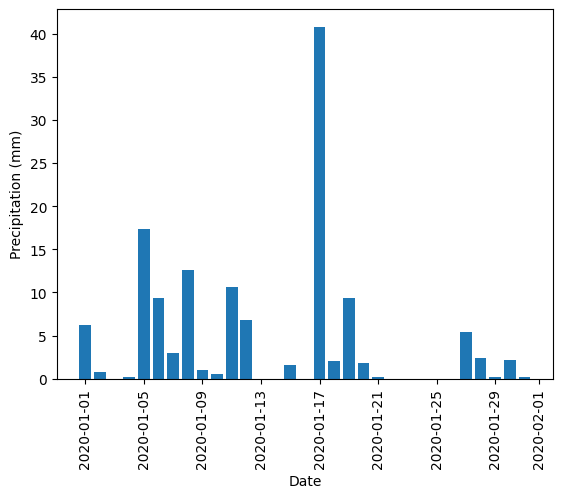

In [228]:

plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')

plt.xticks(rotation=90)
plt.bar('Date/Time', 'Total Precip (mm)', data=df_j2020)
plt.show()

## Summary

Date/time Functionality:
- Use `.dt` to access various time and date functions.
- `parse_dates=` when reading a csv to convert columns into DateTime objects.

String Funcionality:
- Use `.str` to access various string functions.

Concatenating DataFrames:
- ``pd.concat()``

Merging DataFrames:
- ``.merge()``
- Inner merge is intersection.
- Outer merge is union.
- Left merge uses the rows of the base DataFrame.
- Right merge uses the rows of the other DataFrame.